<a href="https://colab.research.google.com/github/Hatsuhinode/Feature-Engineering/blob/main/Mean_Median_Mode_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/Kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

# Handling missing values

## Mean Imputation

Mean imputation involves replacing missing values with mean for that feature.

It is used when the data is **normally distributed** and the missing values are assumed to be **randomly distributed across dataset** (MCAR).

If the data has outliers or if the missing values are not randomly distributed mean imputation can distort the distribution and standard deviation.

## Median Imputation

Median imputation involves replacing missing values with median for that feature.

Median imputation is **less sensitive to outliers** compared to mean imputation and can be a better choice when the **data is skewed or has outliers**.

## Mode Imputation

Mode imputation involves replacing missing values with mode (**most frequent value**) for that feature.

It is suitable for **categorical data** where using mean or median doesnot make sense. For continuous data, mean or median imputation can be used.

In [ ]:
titanicDataframe = pd.read_csv('train.csv')
titanicDataframe.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
titanicDataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanicDf = pd.read_csv('train.csv', usecols = ['PassengerId','Age','Fare','Survived'])
titanicDf.head(6)

,PassengerId,Survived,Age,Fare
0,1,0,22.0,7.2500
1,2,1,38.0,71.2833
2,3,1,26.0,7.9250
3,4,1,35.0,53.1000
4,5,0,35.0,8.0500
5,6,0,NaN,8.4583


In [ ]:
titanicDf.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Age            0.198653
Fare           0.000000
dtype: float64

In [ ]:
def MedianImputation(dataframe, feature, imputationMethod):
    dataframe[feature + 'Median'] = dataframe[feature].fillna(imputationMethod)

In [ ]:
median = titanicDf['Age'].median()
MedianImputation(titanicDf, 'Age', median)
median

28.0

In [ ]:
titanicDf.head(7)

,PassengerId,Survived,Age,Fare,AgeMedian
0,1,0,22.0,7.2500,22.0
1,2,1,38.0,71.2833,38.0
2,3,1,26.0,7.9250,26.0
3,4,1,35.0,53.1000,35.0
4,5,0,35.0,8.0500,35.0
5,6,0,NaN,8.4583,28.0
6,7,0,54.0,51.8625,54.0


### Variation in standard deviation in data of 'Age' and 'AgeMedian'

In [ ]:
print('The standard deviation of data in column "Age" is : ',titanicDf['Age'].std())
print('The standard deviation of data in column "AgeMedian" is : ',titanicDf['AgeMedian'].std())

The standard deviation of data in column "Age" is :  14.526497332334042
The standard deviation of data in column "AgeMedian" is :  13.019696550973201


### Graphical representation of data in 'Age' and 'AgeMedian' column

**Kernel density estimation** (KDE) is used to estimate the **probability density function** of a random variable.

A **probability density function** (PDF) is used to describe the probability distribution of a continuous random variable. It represents the likelihood of a random variable taking on a particular value within a given range.

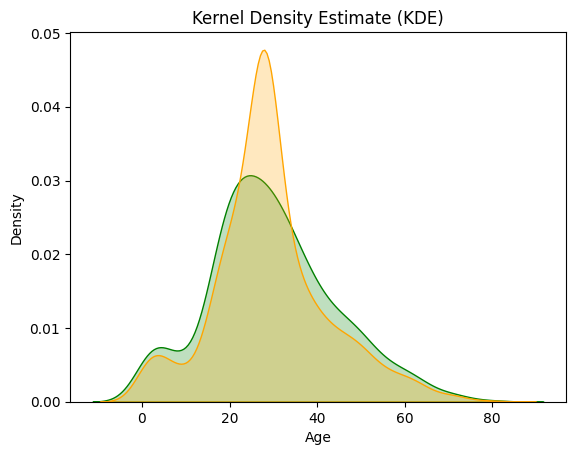

In [ ]:
sns.kdeplot(titanicDf['Age'],color = 'green', fill=True)
sns.kdeplot(titanicDf['AgeMedian'],color = 'orange', fill=True)
plt.title('Kernel Density Estimate (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()